<a href="https://colab.research.google.com/github/vishalrazdan29/data_playground/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [6]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.53.0-cp38-cp38-manylinux2014_x86_64.whl (3.4 MB)
  Using cached llvmlite-0.36.0-cp38-cp38-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyclustertend 1.8.2 requires numba<0.55.0,>=0.54.1, but you have numba 0.53.0 which is incompatible.


In [7]:
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
    Uninstalling llvmlite-0.36.0:
      Successfully uninstalled llvmlite-0.36.0
  Attempting uninstall: numba
    Found existing installation: numba 0.53.0
    Uninstalling numba-0.53.0:
      Successfully uninstalled numba-0.53.0


In [8]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 71.4MB/s]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from pyclustertend import hopkins ## the hopkins test
from sklearn.cluster import AgglomerativeClustering

plt.rcParams['agg.path.chunksize'] = 10000

## **Basic EDA Checks**

In [10]:
df=pd.read_csv("scaler_clustering.csv")

In [11]:
df.drop(columns=['Unnamed: 0'],inplace=True)

Email_hash- Anonymised Personal Identifiable Information (PII)

Company_hash- Current employer of the learner

orgyear- Employment start date

CTC- Current CTC

Job_position- Job profile in the company

CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

In [12]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


**Descriptive Statistics**

In [13]:
df.shape

(205843, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [15]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


**Email hash analysis**

In [16]:
df['email_hash'].nunique()

153443

We are analysing data of 153443 people here.

In [17]:
df['email_hash'].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64

<AxesSubplot: xlabel='email_hash', ylabel='Count'>

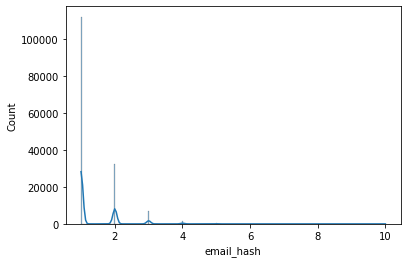

In [18]:
# df['email_hash'].value_counts().plot.hist()
sns.histplot(df['email_hash'].value_counts(),kde=True)

Observation: Most of the users have 1 record in this dataset. 

In [19]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [20]:
df['company_hash'].nunique()

37299

# **Data Cleaning & Prepration**

**Null values And Outlier analysis and handling**

In [21]:
pd.DataFrame({'Percentage Missing':((df.isna().sum()[df.isna().sum()/df.shape[0] >0])/df.shape[0])*100,'Missing Count':(df.isna().sum()[df.isna().sum()/df.shape[0] >0])})

,Percentage Missing,Missing Count
company_hash,0.021376,44
orgyear,0.041779,86
job_position,25.534995,52562


*orgyear feature Analysis*

In [22]:
df['orgyear'].value_counts().index

Float64Index([ 2018.0,  2019.0,  2017.0,  2016.0,  2015.0,  2014.0,  2020.0,
               2013.0,  2012.0,  2011.0,  2010.0,  2009.0,  2021.0,  2008.0,
               2007.0,  2006.0,  2005.0,  2004.0,  2003.0,  2022.0,  2001.0,
               2002.0,  2000.0,  1999.0,  1998.0,  2023.0,  1997.0,  1996.0,
               1995.0,  1991.0,  1993.0,  1994.0,  1992.0,  2024.0,  1990.0,
               1989.0,     0.0,  2025.0,  1988.0,  2026.0,  1986.0,  1987.0,
                  3.0,  1985.0,  2031.0,  2029.0,  1982.0,  2028.0,  1984.0,
                 91.0,     2.0, 20165.0,  1970.0,     6.0,     5.0,     1.0,
               1979.0,    83.0,   209.0,  2204.0,  1977.0,  1900.0,   201.0,
                 38.0,     4.0,  1971.0,   206.0,  1976.0,  2027.0,  1981.0,
               1973.0,  2106.0,  2107.0,  1972.0,  2101.0,   208.0,   200.0],
             dtype='float64')

Removing outlier data in orgyear

In [23]:
#outlier count for orgyear
df[(df['orgyear']<=1970) | (df['orgyear']>date.today().year)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
2211,phrxkv,3394674bb6bb1de6289e931853fa0bd131c811e0054a92...,2031.0,1500000,Backend Engineer,2020.0
2415,xb v onhatzn,ef3565a969075def44d98b6df51f8bbfb42248d0008514...,2024.0,110000,Frontend Engineer,2021.0
3113,onhatzn vn bzzxn vrrvyvmva,c723c1d7ec4d808af6f77d58594e36884340cb803389d6...,2024.0,1200000,Other,2021.0
3651,wgszxkvzn,2cc6bae4e52677d27ce3fca38d7a01ecbe537e1dc1c48d...,2106.0,600000,NaN,2021.0
3893,qtbgnt vzvrjnxwo lgmo,1439cc5e284ee01eaacb919569f4198f8b569612ac5134...,2024.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
193131,vxqvoxv,0a5e691a0f8c2c06862ef19d43dc11c22f462f800db26b...,0.0,800000,NaN,2019.0
196354,vaxnjv mxqrv wvuxnvr,069308440811d578c817c05392f97e8919baac6aa12aa3...,1.0,2900000,Data Scientist,2019.0
198187,xb v onhatzn,9429a19771ae913f169917d380c94f003115aaaf904388...,2025.0,300000,Other,2021.0
202210,mqvmtzatq,d66f939c4318c1958be5bc9e7b70b741aa61be7493ff58...,2028.0,1300000,Backend Engineer,2021.0


This looks like it is a data capture issue.Hence dropping these 132 records will be fine.As this is very less percentage of data as compared to entire dataset.

In [24]:
df=df[(df['orgyear']>1970) & (df['orgyear']<=date.today().year)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='orgyear'>

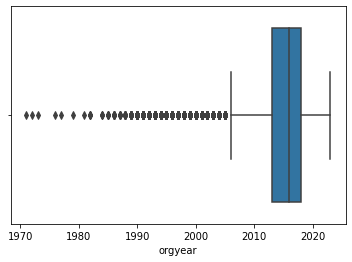

In [25]:
sns.boxplot(df['orgyear'])

In [26]:
df['exp']=date.today().year-df['orgyear']

In [27]:
# df.drop(columns=['orgyear'],inplace=True)

*ctc feature analysis*

In [28]:
df['ctc'].value_counts()

600000      7824
400000      7593
1000000     7572
500000      7236
800000      6747
            ... 
21000000       1
925600         1
29300000       1
43000          1
3327000        1
Name: ctc, Length: 3358, dtype: int64

In [29]:
df[df['ctc'].isnull()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp


Removing top and bottom 1percent of data: IQR

In [30]:
df=df[(df['ctc']>df['ctc'].quantile(0.01))&(df['ctc']<df['ctc'].quantile(0.99))]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='ctc'>

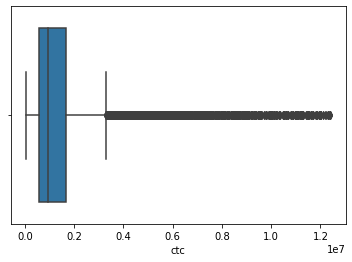

In [31]:
sns.boxplot(df['ctc'])

In [32]:
#ctc updates can not happen before the start of employement.Therefore removing wrong data
df=df[df['ctc_updated_year']>=df['orgyear']]

In [33]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,5.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,6.0


In [34]:
df.isna().sum()

company_hash           36
email_hash              0
orgyear                 0
ctc                     0
job_position        47968
ctc_updated_year        0
exp                     0
dtype: int64

Company hash missing value imputation

In [35]:
df[df['company_hash'].isna()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp
2400,NaN,1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...,2018.0,250000,Other,2019.0,5.0
3277,NaN,66263f4942b046c67ae6e2570e7825c03792631a0b13f1...,2018.0,500000,Other,2019.0,5.0
4205,NaN,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214...,2018.0,600000,NaN,2020.0,5.0
4596,NaN,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...,2020.0,300000,NaN,2021.0,3.0
11753,NaN,ea4f735b9357e8086a42bacc1f64b18e98c3dd1ad81f60...,2018.0,300000,NaN,2021.0,5.0
14739,NaN,b4a56d1199bc569aabd30cba8ea7a86fbddc85211453ba...,2013.0,1600000,NaN,2021.0,10.0
18853,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,FullStack Engineer,2021.0,6.0
19466,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,NaN,2021.0,6.0
22846,NaN,bdce6736cc1d55a909a46aed9e0bfdcd7cd523bfcf9b63...,2010.0,2000000,NaN,2020.0,13.0
31489,NaN,8e70184e76f9a29078e8ddd928d24582e096f5b1a63197...,2018.0,229999,NaN,2021.0,5.0


In [36]:
#Since most of values look missing for job position here when company hash is na.
#Dropping these 36 values will make more sense.
df.dropna(subset=['company_hash'],inplace=True)

In [37]:
df.shape

(193059, 7)

In [38]:
df.isna().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        47942
ctc_updated_year        0
exp                     0
dtype: int64

*job_position feature missing value imputation*

Preparing data for KNN Imputer

---



In [39]:
df['company_hash'].nunique()

35266

**Observation:** More than 38percent of the companies are present only once.This can be handled seprately.

*Encoding the categorical variables*

In [40]:
#Encoding of categorical variables like company_hash,email_hash
le=LabelEncoder()
X=df['company_hash']
df['company_hash_e']=le.fit_transform(X)

In [41]:
X=df['email_hash']
df['email_hash_e']=le.fit_transform(X)

In [42]:
X=df['job_position']
df['job_position_e']=le.fit_transform(X)

*Scaling of Numerical variables*

In [43]:
#Scaling of categorical variables
X=df[['exp','ctc','ctc_updated_year','company_hash_e','email_hash_e','job_position_e']]
scaler = StandardScaler()
sc=scaler.fit_transform(X)

*Knn Imputation*

In [44]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(sc)

array([[-0.25547516, -0.1737612 ,  0.2405539 , -1.65751162, -0.24812076,
        -0.07408494],
       [-0.7325234 , -0.7030303 , -0.55291763,  0.01208322,  0.65909419,
        -0.53919405],
       [-0.01695104,  0.55907181,  0.2405539 , -0.36001732, -0.75467387,
        -0.96554406],
       ...,
       [-1.44809575, -0.49946476,  1.03402543,  0.84749374,  1.01450521,
         1.52696373],
       [-0.97104751,  3.08327441, -0.55291763,  1.47030233,  1.66901136,
         1.52696373],
       [ 0.22157308, -0.05976495, -2.93333222, -1.5505504 , -1.56744918,
         1.52696373]])

In [45]:
df[['exp','ctc','ctc_updated_year','company_hash_e','email_hash_e','job_position_e']]
sdf1=pd.DataFrame({'exp':sc[:,0],'ctc':sc[:,1],'ctc_updated_year':sc[:,2],'company_hash_e':sc[:,3],'email_hash_e':sc[:,4],'job_position_e':sc[:,5]})
_=scaler.inverse_transform(sdf1)
sdf=pd.DataFrame({'exp':_[:,0],'ctc':_[:,1],'ctc_updated_year':_[:,2],'company_hash_e':_[:,3],'email_hash_e':_[:,4],'job_position_e':_[:,5]})
sdf

,exp,ctc,ctc_updated_year,company_hash_e,email_hash_e,job_position_e
0,7.0,1100000.0,2020.0,908.0,61447.0,433.0
1,5.0,449999.0,2019.0,18609.0,98998.0,277.0
2,8.0,2000000.0,2020.0,14664.0,40480.0,134.0
3,6.0,700000.0,2019.0,11431.0,134469.0,134.0
4,6.0,1400000.0,2019.0,19074.0,62573.0,277.0
...,...,...,...,...,...,...
193054,15.0,220000.0,2019.0,27147.0,62613.0,970.0
193055,6.0,500000.0,2020.0,8069.0,71254.0,970.0
193056,2.0,700000.0,2021.0,27466.0,113709.0,970.0
193057,4.0,5100000.0,2019.0,34069.0,140800.0,970.0


In [46]:
sdf.isna().sum()

exp                 0
ctc                 0
ctc_updated_year    0
company_hash_e      0
email_hash_e        0
job_position_e      0
dtype: int64

In [47]:
sdf['job_position_e'].values

array([433., 277., 134., ..., 970., 970., 970.])

In [48]:
sdf.shape

(193059, 6)

In [49]:
df.shape

(193059, 10)

In [50]:
df[df['job_position_e'].isna()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e


*Dropping Duplicates*

In [51]:
sdf[sdf.duplicated()].shape

(26, 6)

In [52]:
sdf=sdf[~sdf.duplicated()]

*Final Outlier Removal using LOF*

In [53]:
df.shape

(193059, 10)

In [54]:
clf = LocalOutlierFactor(n_neighbors=4,contamination=0.3)
# pd.Series().index==1
pred=clf.fit_predict(sc)

In [55]:
inlier_index=pd.Series(pred)[pd.Series(pred)==1].index

In [56]:
inlier_index

Int64Index([     0,      2,      3,      6,      7,      8,      9,     12,
                13,     14,
            ...
            193047, 193048, 193049, 193050, 193051, 193052, 193053, 193054,
            193055, 193058],
           dtype='int64', length=135141)

In [57]:
df=df.iloc[inlier_index]

# **Data Analysis**

In [58]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0,5.0,9601,87329,277
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0,4.0,27537,65604,134


<AxesSubplot: >

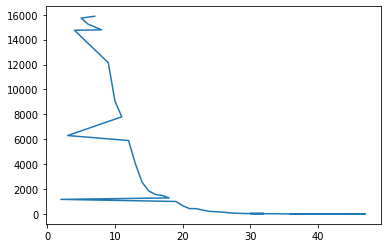

In [59]:
df['exp'].value_counts().plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot: xlabel='orgyear'>

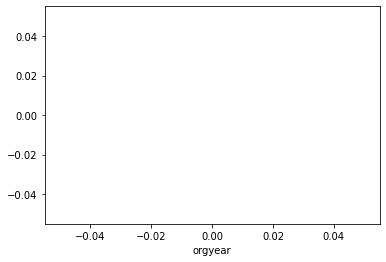

In [60]:
sns.lineplot(df['orgyear'].value_counts())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='job_position', ylabel='ctc'>

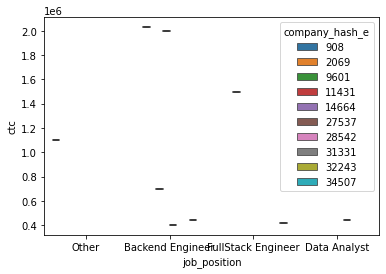

In [61]:
sns.boxplot(df['job_position'][:10],df['ctc'][:10],hue=df['company_hash_e'][:10])

In [62]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0,5.0,9601,87329,277
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0,4.0,27537,65604,134


In [63]:
df[['company_hash_e','job_position_e','exp']]

,company_hash_e,job_position_e,exp
0,908,433,7.0
2,14664,134,8.0
3,11431,134,6.0
6,9601,277,5.0
7,27537,134,4.0
...,...,...,...
205836,10865,970,12.0
205837,34069,970,2.0
205838,27147,970,15.0
205839,8069,970,6.0


Clustering Algorithm

In [64]:
X=df[['company_hash_e','job_position_e','exp']]

In [65]:
X.head()

,company_hash_e,job_position_e,exp
0,908,433,7.0
2,14664,134,8.0
3,11431,134,6.0
6,9601,277,5.0
7,27537,134,4.0


In [66]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0,5.0,9601,87329,277
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0,4.0,27537,65604,134


In [67]:
scaler = StandardScaler()
sc=scaler.fit_transform(X)

In [68]:
fig = px.scatter_3d(df[2000:2500], x='company_hash_e', y='job_position_e', z='exp',
              color='company_hash_e', size='job_position_e', size_max=18,
              symbol='exp')

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [69]:
fig = px.scatter_3d(pd.DataFrame({'company_hash':sc[:400,0],'job_position':sc[:400,1],'exp':sc[:400,2]}), x='company_hash', y='job_position', z='exp',
              color='company_hash', size_max=18,
              symbol='exp')

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

On a very high level we can infer from the 3d plot that there are 3 cluster data in this dataset.

Can be verfied by company vs exp plot and company vs job_position plot.

*kmeans to verify*

In [70]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(sc)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [71]:
# df['cluster']=kmeans.labels_

In [72]:
kmeans.cluster_centers_

array([[ 0.06382772,  1.51264621, -0.2130387 ],
       [-0.88915767, -0.58851026,  0.09304627],
       [ 0.87028004, -0.58142441,  0.07136704]])

In [73]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0,5.0,9601,87329,277
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0,4.0,27537,65604,134


5 point summary on basis of Company, Job Position, Years of Experience

In [74]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0,5.0,9601,87329,277
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0,4.0,27537,65604,134


In [75]:
df1=df[['company_hash','email_hash','ctc','job_position','ctc_updated_year','exp']]

In [76]:
grouped_df=df.groupby(by=['company_hash','job_position','exp'])[['ctc']].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [77]:
grouped_df.columns=['company_hash','job_position','exp','ctc_mean','ctc_median','ctc_max','ctc_min','ctc_count']
grouped_df.head()

,company_hash,job_position,exp,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count
0,0000,Other,6.0,300000.0,300000.0,300000,300000,1
1,01 ojztqsj,Frontend Engineer,12.0,830000.0,830000.0,830000,830000,1
2,1000uqgltwn,Frontend Engineer,4.0,600000.0,600000.0,600000,600000,1
3,103 onhaxgo ucn rna,Frontend Engineer,9.0,320000.0,320000.0,320000,320000,1
4,10dvx rtvqzxzs,Data Scientist,3.0,400000.0,400000.0,400000,400000,1


*Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience*

In [78]:
merged_df=pd.merge(df,grouped_df,how='inner',on=['company_hash','job_position','exp'])
merged_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433,1100000.0,1100000.0,1100000,1100000,1
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134,2000000.0,2000000.0,2000000,2000000,1
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134,1090000.0,1030000.0,1600000,700000,4
3,ngpgutaxv,c9e14b4d46b1a76974a2e06bc546886cff85bd441f21b8...,2017.0,1600000,Backend Engineer,2019.0,6.0,11431,112978,134,1090000.0,1030000.0,1600000,700000,4
4,ngpgutaxv,400aea75dc1316022b8c4436c60a0646fbea2962e26a5a...,2017.0,1210000,Backend Engineer,2019.0,6.0,11431,35942,134,1090000.0,1030000.0,1600000,700000,4


In [79]:
def get_flag(ctc,mean,max,min,count):
    if count==1:
      return 1
    else:
      if ctc==max:
        return 1
      elif ctc==min:
        return 3
      else:
        return 2

merged_df['rank_by_cje']=merged_df.apply(lambda x: get_flag(x['ctc'], x['ctc_mean'],x['ctc_max'],x['ctc_min'],x['ctc_count']), axis=1)

*Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company & Job Position level*

In [80]:
grouped_df=df.groupby(by=['company_hash','job_position'])[['ctc']].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
grouped_df.columns=['company_hash','job_position','ctc_mean','ctc_median','ctc_max','ctc_min','ctc_count']
# grouped_df.head()

In [81]:
merged_df1=pd.merge(df,grouped_df,how='inner',on=['company_hash','job_position'])
merged_df1.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433,1.085000e+06,1085000.0,1100000,1070000,2
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,908,58995,433,1.085000e+06,1085000.0,1100000,1070000,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134,2.000000e+06,2000000.0,2000000,2000000,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134,1.604667e+06,1600000.0,3500000,520000,15
4,ngpgutaxv,a98892c2a9d2e7aa6ebe7b6129d1b9655ec72507b3213c...,2020.0,520000,Backend Engineer,2020.0,3.0,11431,94930,134,1.604667e+06,1600000.0,3500000,520000,15


In [82]:
merged_df1['rank_by_cj']=merged_df1.apply(lambda x: get_flag(x['ctc'], x['ctc_mean'],x['ctc_max'],x['ctc_min'],x['ctc_count']), axis=1)

In [83]:
merged_df1.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_cj
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433,1.085000e+06,1085000.0,1100000,1070000,2,1
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,908,58995,433,1.085000e+06,1085000.0,1100000,1070000,2,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134,2.000000e+06,2000000.0,2000000,2000000,1,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134,1.604667e+06,1600000.0,3500000,520000,15,2
4,ngpgutaxv,a98892c2a9d2e7aa6ebe7b6129d1b9655ec72507b3213c...,2020.0,520000,Backend Engineer,2020.0,3.0,11431,94930,134,1.604667e+06,1600000.0,3500000,520000,15,3


In [84]:
merged_df1.shape

(101370, 16)

*Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company*

In [85]:
grouped_df=df.groupby(by=['company_hash'])[['ctc']].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
grouped_df.columns=['company_hash','ctc_mean','ctc_median','ctc_max','ctc_min','ctc_count']
# grouped_df.head()

In [86]:
merged_df2=pd.merge(df,grouped_df,how='inner',on=['company_hash'])
merged_df2.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433,1248200.0,1100000.0,1771000,800000,5
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,908,58995,433,1248200.0,1100000.0,1771000,800000,5
2,atrgxnnt xzaxv,dc8d39f3e9dd9f7576194e1a13c233bfe704bf9a72df99...,2014.0,800000,QA Engineer,2019.0,9.0,908,123488,495,1248200.0,1100000.0,1771000,800000,5
3,atrgxnnt xzaxv,ab2b1b176cd5831ff3002043c82b075812a12ba212fa18...,2011.0,1771000,FullStack Engineer,2019.0,12.0,908,95880,277,1248200.0,1100000.0,1771000,800000,5
4,atrgxnnt xzaxv,0abaddb8cb2925b7bfcda79f3d533ad76c6c7ed01dadd4...,2012.0,1500000,Security Leadership,2018.0,11.0,908,6229,575,1248200.0,1100000.0,1771000,800000,5


In [87]:
merged_df2['rank_by_c']=merged_df2.apply(lambda x: get_flag(x['ctc'], x['ctc_mean'],x['ctc_max'],x['ctc_min'],x['ctc_count']), axis=1)

In [88]:
merged_df2.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_c
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433,1248200.0,1100000.0,1771000,800000,5,2
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,908,58995,433,1248200.0,1100000.0,1771000,800000,5,2
2,atrgxnnt xzaxv,dc8d39f3e9dd9f7576194e1a13c233bfe704bf9a72df99...,2014.0,800000,QA Engineer,2019.0,9.0,908,123488,495,1248200.0,1100000.0,1771000,800000,5,3
3,atrgxnnt xzaxv,ab2b1b176cd5831ff3002043c82b075812a12ba212fa18...,2011.0,1771000,FullStack Engineer,2019.0,12.0,908,95880,277,1248200.0,1100000.0,1771000,800000,5,1
4,atrgxnnt xzaxv,0abaddb8cb2925b7bfcda79f3d533ad76c6c7ed01dadd4...,2012.0,1500000,Security Leadership,2018.0,11.0,908,6229,575,1248200.0,1100000.0,1771000,800000,5,2


In [89]:
merged_df2.shape

(135141, 16)

Based on the manual clustering done so far, answering few questions like

	- Top 10 employees (earning more than most of the employees in the company) - Tier 1
	- Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1
	- Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3
	- Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

*List of People earning most in their respective companies*

In [90]:
z=merged_df2[merged_df2['rank_by_c']==1]
z.sort_values(by='ctc',ascending=False)[:10]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_c
113267,wvqttb,676c79caf7335f5001ff506856e62254c6a14b29848246...,2015.0,12400000,Backend Engineer,2020.0,8.0,29993,57902,134,7.172857e+06,7600000.0,12400000,100000,14,1
113261,wvqttb,676c79caf7335f5001ff506856e62254c6a14b29848246...,2015.0,12400000,Engineering Leadership,2020.0,8.0,29993,57902,243,7.172857e+06,7600000.0,12400000,100000,14,1
113274,wvqttb,676c79caf7335f5001ff506856e62254c6a14b29848246...,2015.0,12400000,Other,2020.0,8.0,29993,57902,433,7.172857e+06,7600000.0,12400000,100000,14,1
8282,xzegojo,85e685ccaf737be77245c7bd8d06f7007e37ae8fe9a112...,2016.0,12350000,Other,2021.0,7.0,32004,74894,433,6.401860e+05,500000.0,12350000,50000,3808,1
83854,nton wgbuvzj,ac2d7e5c68c2d161df3ab49e33a358c5413d2f4857bc32...,2002.0,12300000,NaN,2020.0,21.0,12124,96470,970,3.703333e+06,1300000.0,12300000,600000,9,1
57445,sgrabvz ovwyo,e969c49537623bcf8984ee79a406be5d3ec9a77695884a...,2012.0,12221000,Engineering Leadership,2020.0,11.0,20296,130696,243,2.725172e+06,2600000.0,12221000,110000,516,1
31288,mta mvny mtjgza,eec73373a6401ffc4f184913441523ce5c645b41a08804...,2015.0,12200000,Devops Engineer,2020.0,8.0,10583,133758,218,3.133333e+06,1300000.0,12200000,500000,6,1
104427,a2ogr xzw,9051d086afb0d1edc3afcc18d08298063d2c23c0bd1ef1...,2012.0,12000000,Backend Engineer,2020.0,11.0,266,80791,134,4.084333e+06,143000.0,12000000,110000,3,1
52245,fvrbvqn rvmo,53bf8fdff1012a8cfa111fd7291e4ae5f113751184c564...,2018.0,12000000,Data Scientist,2020.0,5.0,6643,46777,198,2.758222e+06,2500000.0,12000000,86000,582,1
126396,sggsrt pgqtv,42115d9800915370ddd0ae9bc63316fa446e9ec65fd1a8...,2018.0,12000000,Other,2020.0,5.0,20253,37007,433,1.200000e+07,12000000.0,12000000,12000000,1,1


*Top 10 employees of data science in Amazon / TCS etc earning more than their peer*

In [91]:
z=merged_df1[(merged_df1['job_position']=='Data Scientist') & (merged_df1['rank_by_cj']==1)]
z.sort_values(by='ctc',ascending=False)[:10]


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_cj
52834,exwg,d1290b7e2d85c75902b863ccc3e4aafdd6e6eb07a10a00...,2013.0,12000000,Data Scientist,2020.0,10.0,5980,117138,198,5.350000e+06,2300000.0,12000000,1750000,3,1
76221,mgtxzs,6b6466eb7dec3b55b8758b7850b9ca2ff562c4f7e654fa...,2019.0,12000000,Data Scientist,2020.0,4.0,9955,60108,198,6.455000e+06,6455000.0,12000000,910000,2,1
16959,fvrbvqn rvmo,53bf8fdff1012a8cfa111fd7291e4ae5f113751184c564...,2018.0,12000000,Data Scientist,2020.0,5.0,6643,46777,198,4.625385e+06,4700000.0,12000000,1800000,13,1
44618,sggsrt,b17a6bbd97fdca270fba3775ccca535a7c29ce67952914...,2014.0,11000000,Data Scientist,2020.0,9.0,20249,99439,198,3.750000e+06,1750000.0,11000000,500000,4,1
48666,vbvkgz,40a415ae6cd1eba19ac74f88dc2f0b7e19f398092236ee...,2014.0,10900000,Data Scientist,2019.0,9.0,25048,36248,198,2.663333e+06,2165000.0,10900000,600000,18,1
94527,tbgntrr wgqu,7e8714928b37787285f93c441eabaed2a1a57dae7f6742...,2018.0,10000000,Data Scientist,2019.0,5.0,21507,70720,198,1.000000e+07,10000000.0,10000000,10000000,1,1
94411,mxsnvuu vzvrjnxwo unt rna,726afdfd4b394a5030c96c71f3cc43583d7e707ac0d950...,2012.0,10000000,Data Scientist,2019.0,11.0,11183,63985,198,1.000000e+07,10000000.0,10000000,10000000,1,1
32837,fxuqg rxbxnta,c19d6c77a80b3e5163c6f6555f116351768de98aa976a7...,2016.0,10000000,Data Scientist,2020.0,7.0,6817,108377,198,1.215650e+06,745000.0,10000000,100000,20,1
34755,zgn vuurxwvmrt vwwghzn,1ff756b1855c0faa035c7873dee21d01a6d4b2cb18f0eb...,2021.0,10000000,Data Scientist,2021.0,2.0,34070,18066,198,1.469231e+06,950000.0,10000000,110000,26,1
37801,atrr,5786e82bd211093df08e360d9af9ea6adea8fe6885477b...,2017.0,10000000,Data Scientist,2020.0,6.0,937,48903,198,4.283333e+06,2050000.0,10000000,800000,3,1


*Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3*

In [92]:
z=merged_df1[(merged_df1['job_position']=='Data Scientist') & (merged_df1['rank_by_cj']==3)]
z.sort_values(by='ctc',ascending=True)[:10]


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_cj
61955,dtqgd,ece6f9a4632851c64571a572cf36f67f980f8d7ac9f553...,2015.0,45000,Data Scientist,2019.0,8.0,4896,132680,198,8.725000e+05,872500.0,1700000,45000,2,3
66732,tqxwoogz,d8b6c25488ee764c6dbd20c56ad8dca794b6347d6448e2...,2017.0,49000,Data Scientist,2017.0,6.0,22301,121339,198,1.505210e+06,1100000.0,6000000,49000,19,3
73980,xzntr wgqugqvnxgz,6344f65bdb7dc5da9abb8bdb0f90b92718ac2f85556746...,2015.0,60000,Data Scientist,2017.0,8.0,32377,55604,198,1.633571e+06,2200000.0,2600000,60000,7,3
42484,zcxaxv,4e2f9e739539b86fe800c8d725ff6bb0992554a680a8ed...,2011.0,70000,Data Scientist,2020.0,12.0,33908,43626,198,1.850000e+05,185000.0,300000,70000,2,3
47615,st,4ebd1de06ea74f97f7f742624a085a0ecc85cda1dbc0c6...,2015.0,84000,Data Scientist,2020.0,8.0,20889,43944,198,1.722333e+06,855000.0,4400000,84000,6,3
46920,utqoxontzn ojontbo,111cee98d7674b76edb56b23f211aaaf9a2a334272b0e2...,2018.0,90000,Data Scientist,2018.0,5.0,23967,9816,198,1.158000e+06,1000000.0,2400000,90000,5,3
31922,wgszxkvzn,70b068923738c30d91d2f119f5eac1bbd9f1ee7da8609e...,2007.0,94000,Data Scientist,2017.0,16.0,28542,63009,198,9.222273e+05,637500.0,5500000,94000,22,3
54966,bxwqgogen,284479e6f13602a32f010c5edef90c213ee6d8f5c2e9eb...,2016.0,94000,Data Scientist,2019.0,7.0,3583,22723,198,2.717107e+06,3000000.0,8600000,94000,28,3
32825,fxuqg rxbxnta,fbfda8c79b1c1d001012977c40a8fd6522bde5aa8d1b17...,2012.0,100000,Data Scientist,2019.0,11.0,6817,141206,198,1.215650e+06,745000.0,10000000,100000,20,3
32309,otre tburgjta,70bceda3e966d687175b70cf4b2b554a0f7ea62f7aafd9...,2002.0,100000,Data Scientist,2021.0,21.0,15419,63044,198,1.096667e+06,750000.0,2500000,100000,6,3


*Bottom 10 employees (earning less than most of the employees in the company)- Tier 3*

In [93]:
z=merged_df2[merged_df2['rank_by_c']==3]
z.sort_values(by='ctc',ascending=True)[:10]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_c
47070,zgzt,95eefe9163e7e60fbf929bb9a422f33154eb62f3a107bd...,2017.0,39000,Backend Engineer,2017.0,6.0,34155,83978,134,9.041896e+05,600000.0,10000000,39000,269,3
98172,rvkvav sqghu,d2a62accb5d8e790d416025d409cbedd27da23a9359a53...,2013.0,39000,Backend Engineer,2020.0,10.0,19803,117978,134,1.705667e+06,1800000.0,4120000,39000,6,3
87959,vnytzvytvrny,342f303567fc62ac0c56d66f92481bc68c6e470ab8815d...,2007.0,39550,NaN,2019.0,16.0,25865,29305,970,2.541696e+06,2300000.0,8500000,39550,82,3
87999,vnytzvytvrny,342f303567fc62ac0c56d66f92481bc68c6e470ab8815d...,2007.0,39550,FullStack Engineer,2019.0,16.0,25865,29305,277,2.541696e+06,2300000.0,8500000,39550,82,3
77394,pubs,2bcfd00099cbfcf9aced9e4cca91d569fd13d971af6e17...,2012.0,40000,Backend Engineer,2018.0,11.0,17579,24712,134,9.156363e+05,909999.5,1900000,40000,66,3
113200,wtevrg,ec3080005e17cb2627a6bb9f82d37e66d3f53bf36c913a...,2014.0,40000,FullStack Engineer,2021.0,9.0,29621,132277,277,3.066667e+05,80000.0,800000,40000,3,3
73908,zgn vuurxwvmrt vwwghzn,eec045e2dbf8bee6ae35efd1cff8a82e60771b614778a7...,2010.0,40000,Backend Engineer,2021.0,13.0,34070,133741,134,9.264513e+05,600000.0,10000000,40000,2223,3
100428,zxpt,97e6483cecf9506b08661388ffbffe3cee65c7c2a53a27...,2013.0,40000,Backend Engineer,2020.0,10.0,35157,85082,134,1.336000e+06,1700000.0,3100000,40000,5,3
126381,ztfwvonrt hzxctqoxnj,62896d35ac0eef1652f93f75f3e322789d9bbfedfd08fe...,2018.0,40000,NaN,2018.0,5.0,34520,55207,970,2.650000e+05,265000.0,490000,40000,2,3
40944,otre tburgjta,081977c7844f8bb84baab37db4b02f258ff560d86d9d92...,2001.0,40000,Other,2021.0,22.0,15419,4644,433,1.124802e+06,650000.0,10000000,40000,388,3


*Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X*

In [94]:
merged_df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_cje
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433,1100000.0,1100000.0,1100000,1100000,1,1
1,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134,2000000.0,2000000.0,2000000,2000000,1,1
2,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134,1090000.0,1030000.0,1600000,700000,4,3
3,ngpgutaxv,c9e14b4d46b1a76974a2e06bc546886cff85bd441f21b8...,2017.0,1600000,Backend Engineer,2019.0,6.0,11431,112978,134,1090000.0,1030000.0,1600000,700000,4,1
4,ngpgutaxv,400aea75dc1316022b8c4436c60a0646fbea2962e26a5a...,2017.0,1210000,Backend Engineer,2019.0,6.0,11431,35942,134,1090000.0,1030000.0,1600000,700000,4,2


In [95]:
z=merged_df[(merged_df['company_hash']=='nxbto xzntqztn') & (merged_df['job_position']=='Backend Engineer') & ((merged_df['exp']==5.0) |(merged_df['exp']==6.0)|(merged_df['exp']==7.0))]
z[z['rank_by_cje']==1]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_cje
33470,nxbto xzntqztn,677562fba0fabcca5b0fca4ac143a6630a2016e9d53a9b...,2016.0,2400000,Backend Engineer,2019.0,7.0,13080,57910,134,1.717857e+06,1750000.0,2400000,1000000,7,1
39347,nxbto xzntqztn,01c09f5bde72c3862f669733c59176afa30376b6aac17d...,2017.0,400000,Backend Engineer,2018.0,6.0,13080,943,134,4.000000e+05,400000.0,400000,400000,1,1
51607,nxbto xzntqztn,3c70eb14d9092e802cc802f160bcd5d9d26477f5f027bd...,2018.0,2000000,Backend Engineer,2020.0,5.0,13080,33926,134,1.666667e+06,1800000.0,2000000,1200000,3,1


*Top 10 companies (based on their CTC)*

In [96]:
z=merged_df2[merged_df2['rank_by_c']==1]
z.sort_values(by='ctc',ascending=False)[:10]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc_mean,ctc_median,ctc_max,ctc_min,ctc_count,rank_by_c
113267,wvqttb,676c79caf7335f5001ff506856e62254c6a14b29848246...,2015.0,12400000,Backend Engineer,2020.0,8.0,29993,57902,134,7.172857e+06,7600000.0,12400000,100000,14,1
113261,wvqttb,676c79caf7335f5001ff506856e62254c6a14b29848246...,2015.0,12400000,Engineering Leadership,2020.0,8.0,29993,57902,243,7.172857e+06,7600000.0,12400000,100000,14,1
113274,wvqttb,676c79caf7335f5001ff506856e62254c6a14b29848246...,2015.0,12400000,Other,2020.0,8.0,29993,57902,433,7.172857e+06,7600000.0,12400000,100000,14,1
8282,xzegojo,85e685ccaf737be77245c7bd8d06f7007e37ae8fe9a112...,2016.0,12350000,Other,2021.0,7.0,32004,74894,433,6.401860e+05,500000.0,12350000,50000,3808,1
83854,nton wgbuvzj,ac2d7e5c68c2d161df3ab49e33a358c5413d2f4857bc32...,2002.0,12300000,NaN,2020.0,21.0,12124,96470,970,3.703333e+06,1300000.0,12300000,600000,9,1
57445,sgrabvz ovwyo,e969c49537623bcf8984ee79a406be5d3ec9a77695884a...,2012.0,12221000,Engineering Leadership,2020.0,11.0,20296,130696,243,2.725172e+06,2600000.0,12221000,110000,516,1
31288,mta mvny mtjgza,eec73373a6401ffc4f184913441523ce5c645b41a08804...,2015.0,12200000,Devops Engineer,2020.0,8.0,10583,133758,218,3.133333e+06,1300000.0,12200000,500000,6,1
104427,a2ogr xzw,9051d086afb0d1edc3afcc18d08298063d2c23c0bd1ef1...,2012.0,12000000,Backend Engineer,2020.0,11.0,266,80791,134,4.084333e+06,143000.0,12000000,110000,3,1
52245,fvrbvqn rvmo,53bf8fdff1012a8cfa111fd7291e4ae5f113751184c564...,2018.0,12000000,Data Scientist,2020.0,5.0,6643,46777,198,2.758222e+06,2500000.0,12000000,86000,582,1
126396,sggsrt pgqtv,42115d9800915370ddd0ae9bc63316fa446e9ec65fd1a8...,2018.0,12000000,Other,2020.0,5.0,20253,37007,433,1.200000e+07,12000000.0,12000000,12000000,1,1


*Top 2 positions in every company (based on their CTC)*

In [97]:
# z=merged_df1[merged_df1['rank_by_cj']==1]
# # z.sort_values(by='ctc',ascending=False)[:10]
# z[z['company_hash']=='tbxo ytvrny']
# df.head()
z=pd.concat([df,df.groupby('company_hash')['ctc'].rank('max')],axis=1)
z[z['company_hash']=='atrgxnnt xzaxv']
# df.shape 

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e,ctc
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433,3.0
70765,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,908,58995,433,2.0
91670,atrgxnnt xzaxv,dc8d39f3e9dd9f7576194e1a13c233bfe704bf9a72df99...,2014.0,800000,QA Engineer,2019.0,9.0,908,123488,495,1.0
151627,atrgxnnt xzaxv,ab2b1b176cd5831ff3002043c82b075812a12ba212fa18...,2011.0,1771000,FullStack Engineer,2019.0,12.0,908,95880,277,5.0
194546,atrgxnnt xzaxv,0abaddb8cb2925b7bfcda79f3d533ad76c6c7ed01dadd4...,2012.0,1500000,Security Leadership,2018.0,11.0,908,6229,575,4.0


In [98]:
df[df['company_hash']=='atrgxnnt xzaxv']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433
70765,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014.0,1070000,Other,2018.0,9.0,908,58995,433
91670,atrgxnnt xzaxv,dc8d39f3e9dd9f7576194e1a13c233bfe704bf9a72df99...,2014.0,800000,QA Engineer,2019.0,9.0,908,123488,495
151627,atrgxnnt xzaxv,ab2b1b176cd5831ff3002043c82b075812a12ba212fa18...,2011.0,1771000,FullStack Engineer,2019.0,12.0,908,95880,277
194546,atrgxnnt xzaxv,0abaddb8cb2925b7bfcda79f3d533ad76c6c7ed01dadd4...,2012.0,1500000,Security Leadership,2018.0,11.0,908,6229,575


Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data->Already DONE

Unsupervised Learning - Clustering
  - Checking clustering tendency
  - Elbow method
  - K-means clustering
  - Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)

Insights from Unsupervised Clustering

Provide actionable Insights & Recommendations for the Business.

In [99]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,exp,company_hash_e,email_hash_e,job_position_e
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,7.0,908,61447,433
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,8.0,14664,40480,134
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,6.0,11431,134469,134
6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0,5.0,9601,87329,277
7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0,4.0,27537,65604,134


In [100]:
#Scaling of categorical variables
X=df[['exp','ctc','ctc_updated_year','company_hash_e','email_hash_e','job_position_e']]
scaler = StandardScaler()
sc=scaler.fit_transform(X)

In [101]:
len(sc)

135141

In [102]:
hopkins(sc,10000)

0.09162083552202355

Since the hopkins hypothesis is very close to 0 which tells us that the dataset has high cluster tendency.

*Elbow Method*

In [103]:
wcss=[]
x=[]
for i in range(8,0,-1):
  kmeans = KMeans(n_clusters=i, random_state=42).fit(sc)
  x.append(i)
  wcss.append(kmeans.inertia_)  

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

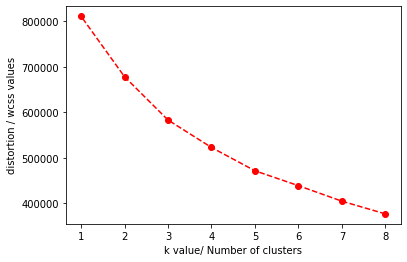

In [104]:
plt.plot(x, wcss,marker='o', linestyle='--', color='r')
plt.xticks(x, x)
plt.xlabel('k value/ Number of clusters')
plt.ylabel('distortion / wcss values')
plt.show()

From this elbow method it can be deduced that a good value of k is 3 as after k=3 there is not much of impact on wcss values.

In [105]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(sc)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [106]:
df['cluster_no']=kmeans.predict(sc)

In [107]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'exp', 'company_hash_e', 'email_hash_e',
       'job_position_e', 'cluster_no'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='job_position_e', ylabel='exp'>

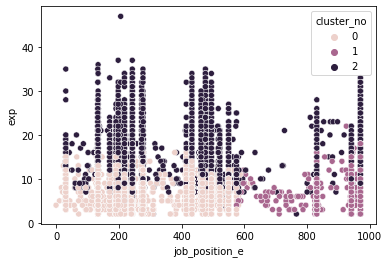

In [108]:
sns.scatterplot(df['job_position_e'],df['exp'],hue=df['cluster_no'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='ctc_updated_year', ylabel='exp'>

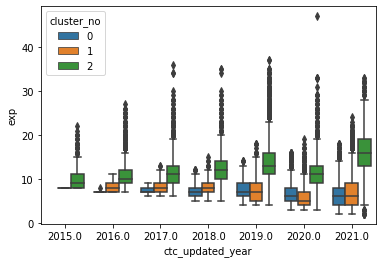

In [109]:
sns.boxplot(df['ctc_updated_year'],df['exp'],hue=df['cluster_no'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='ctc', ylabel='exp'>

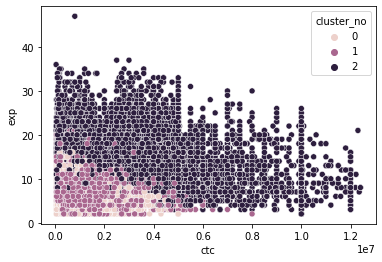

In [110]:
# sns.pairplot(df)
sns.scatterplot(df['ctc'],df['exp'],hue=df['cluster_no'])

In [111]:
fig = px.scatter_3d(df, x='job_position_e', y='ctc', z='exp',
              color='cluster_no', size_max=18)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

Clearly visible 3 clusters

In [112]:
#Scaling of categorical variables
df1=df[:1000]
X=df1[['exp','ctc','ctc_updated_year','company_hash_e','email_hash_e','job_position_e']]
scaler = StandardScaler()
sc=scaler.fit_transform(X)

In [115]:
clustering = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [119]:
df1['hc_cluster']=clustering.fit_predict(sc)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

<ipython-input-119-edaff348150c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
(df1['cluster_no']==df1['hc_cluster']).sum()

947

53 point difference in cluster identifed by kmeans and hierarchial.

Recommendations:

-Cluster are mainly differentiated based on ctc.So groups of people can be identified on basis of these groups.

-Two different clusters are identified on basis on ctc and salary.A different motivating factors can be advertised to attract such people.

-People with more ctc and experience are probably looking for role movement and similar marketing strategies can be devised to attart such students for enrollment.

# **Next Try**

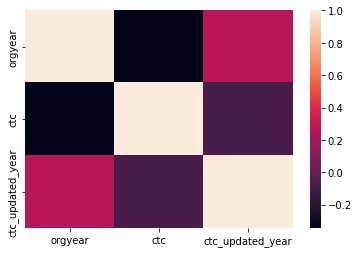

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


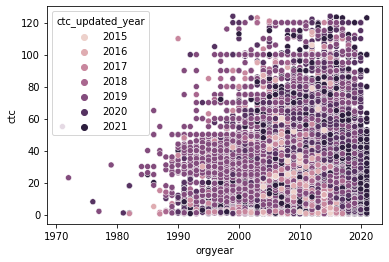

In [ ]:
sns.scatterplot(df['orgyear'],df['ctc']/100000,hue=df['ctc_updated_year'])

In [ ]:
df['exp']=date.today().year-df['']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [ ]:
df[df['company_hash'].isnull()]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1115,NaN,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...,2022.0,66600000,NaN,2020.0
2400,NaN,1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...,2018.0,250000,Other,2019.0
3277,NaN,66263f4942b046c67ae6e2570e7825c03792631a0b13f1...,2018.0,500000,Other,2019.0
4205,NaN,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214...,2018.0,600000,NaN,2020.0
4596,NaN,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...,2020.0,300000,NaN,2021.0
11753,NaN,ea4f735b9357e8086a42bacc1f64b18e98c3dd1ad81f60...,2018.0,300000,NaN,2021.0
14739,NaN,b4a56d1199bc569aabd30cba8ea7a86fbddc85211453ba...,2013.0,1600000,NaN,2021.0
18853,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,FullStack Engineer,2021.0
19466,NaN,07a60d6e853852471b0963b78a0a3074532572a2580864...,2017.0,700000,NaN,2021.0
22846,NaN,bdce6736cc1d55a909a46aed9e0bfdcd7cd523bfcf9b63...,2010.0,2000000,NaN,2020.0


In [ ]:
date.today().year

2023

In [ ]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [ ]:
# df['exp'].median()

In [ ]:
# df['exp']=date.today().year-df['orgyear']

In [ ]:
# df.head()

In [ ]:
# df['exp'].isna().sum()

In [ ]:
# df.columns

In [ ]:
# X=df[['orgyear','ctc','ctc_updated_year']]
X=df[['orgyear']]
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
sc=scaler.transform(X)

In [ ]:
# sns.histplot(sc[:,0])

In [ ]:
# sdf=pd.DataFrame({'orgyear':sc[:,0],'ctc':sc[:,1],'ctc_updated_year':sc[:,2]})
sdf=pd.DataFrame({'orgyear':sc[:,0]})


In [ ]:
sdf.isna().sum()

orgyear    86
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


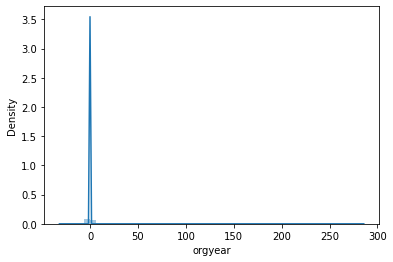

In [ ]:
sns.distplot(sdf['orgyear'])

In [ ]:
imputer = KNNImputer(n_neighbors=5)
sc=imputer.fit_transform(sdf)
# df=pd.DataFrame({'orgyear':sc[:,0],'ctc':sc[:,1],'ctc_updated_year':sc[:,2]})
# df['orgyear']=sc[:,0]
sdf['orgyear']=sc[:,0]
# df['ctc_updated_year']=sc[:,2]
df['orgyear']=scaler.inverse_transform(sdf)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


sort by ctc and year and then fill company hash for missing

In [ ]:
df.sort_values(by=['ctc'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
135435,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,Backend Engineer,2019.0
118236,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,NaN,2018.0
114164,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,NaN,2018.0
184946,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,NaN,2018.0
183804,xm,75357254a31f133e2d3870057922feddeba82b88056a07...,2019.0,16,NaN,2018.0
...,...,...,...,...,...,...
12601,fxuqg rxbxnta,89f343bf01094accb8b0b2c799499daf6bf881321db2e4...,2017.0,200000000,NaN,2020.0
13564,rxzphu,86385b1909eaedb88d27206d3e53a076b4d07b685598ef...,2012.0,200000000,Other,2020.0
3301,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021.0,250000000,NaN,2020.0
117636,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,NaN,2016.0


In [ ]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

To check for special characters if any

In [ ]:
df['job_position'].unique().tolist()[:10]

['Other',
 'FullStack Engineer',
 'Backend Engineer',
 nan,
 'iOS Engineer',
 'Data Analyst',
 'Frontend Engineer',
 'QA Engineer',
 'Engineering Leadership',
 'Data Scientist']

In [ ]:
df[df['job_position']=='Other'].shape

(18071, 6)

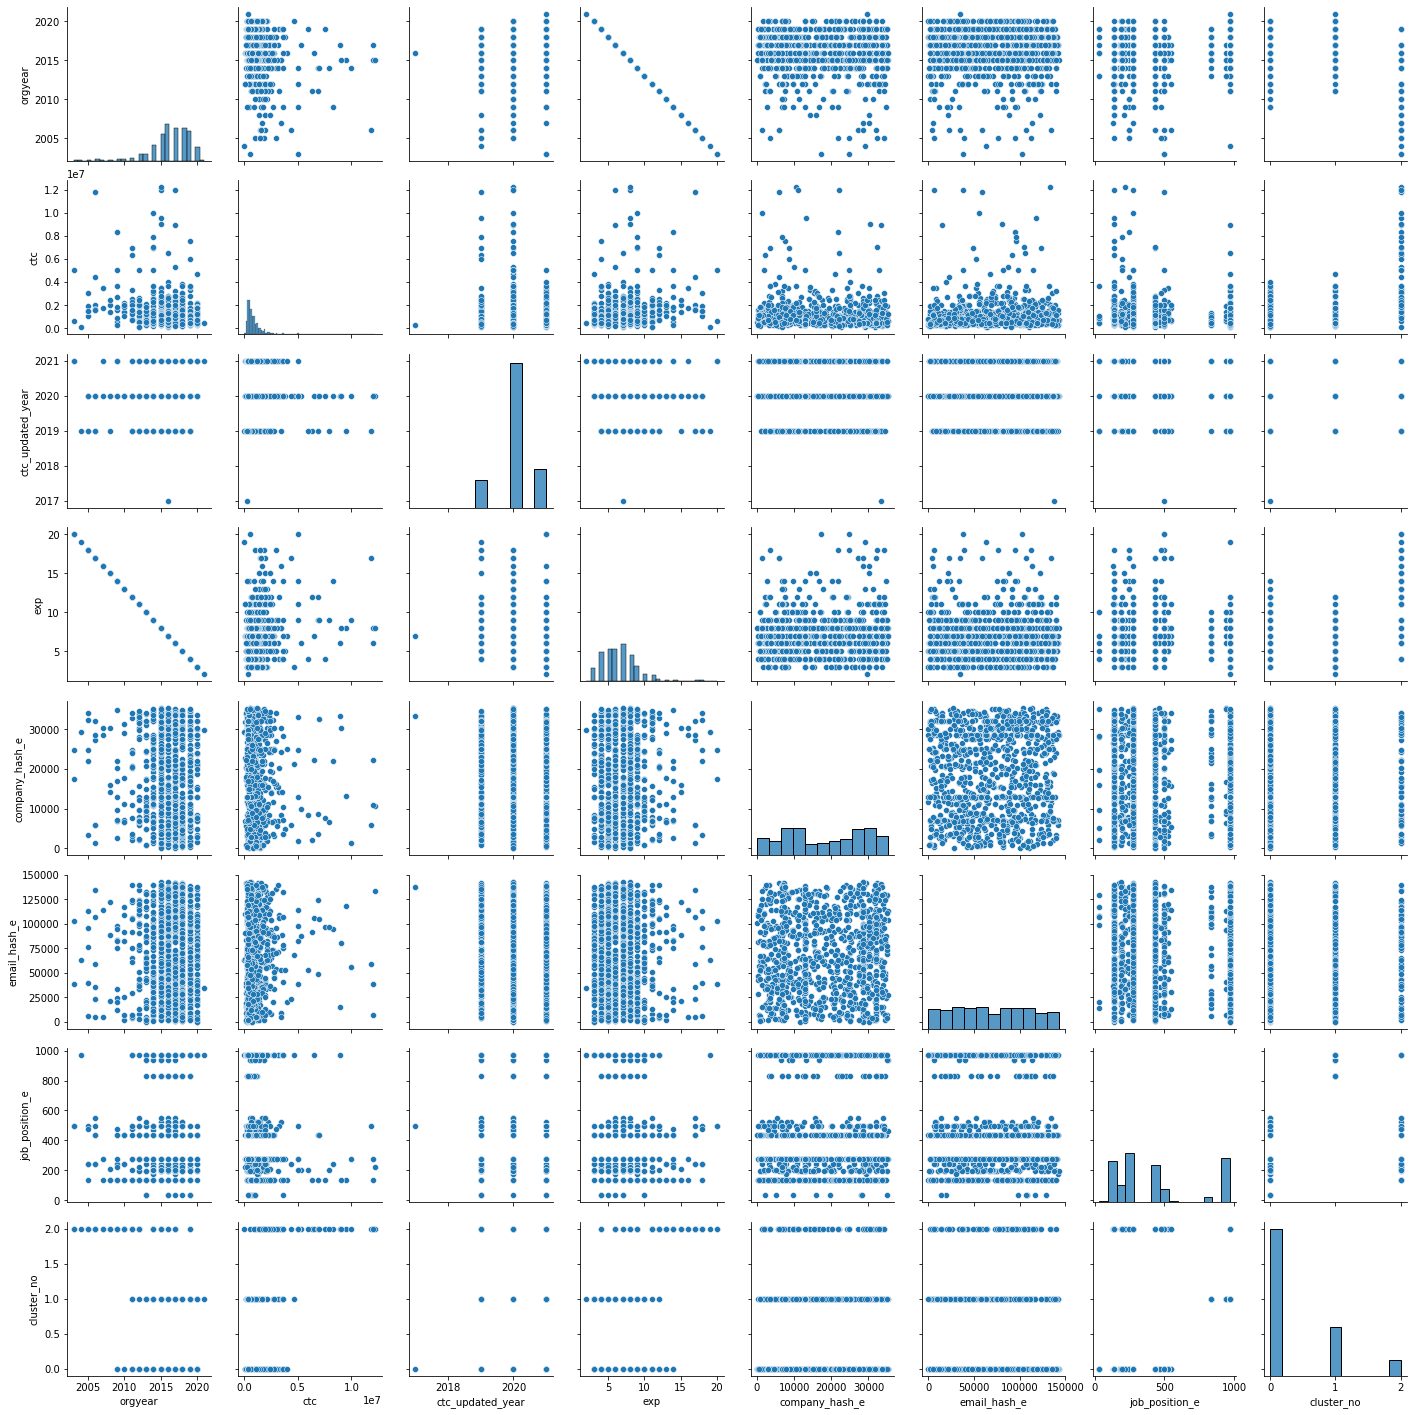

In [113]:
sns.pairplot(df[:1000])